In [4]:
### Kaggele 竞赛-HousePrice 预测

#####  基本思路主要是：
> **第一部分：数据工程**
- 通过可视化方法、相关矩阵等方法，假设相关特征，然后进行验证。\
  最终目的是确认最相关特征，把这些特征作为x。

> **第二部分：机器学习算法预测分析**
- 利用线性回归模型，进行预测；
  本例子使用了两种数据处理方式\
  1 使用sklearn 中工具，对x，y做归一化处理，\
  2 对y使用log1p(),y的分布右偏态，可以通过这个技巧实现正态分布；\
  3 将两种模型应用于test.csv中的x，评测效果。\
  
  ***结论：log1p(y)效果要明显好，kaggle分数从0.47到0.18，排名提升609名。***

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
data_train=pd.read_csv("c:/csv/train_houseprice.csv")

In [7]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### 二  分析目标变量及主要特征关系

**本阶段的主要任务是：**\
1 分析目标变量即SalePrice；\
2 从大量的特征变量筛选相关性大的变量；\
3 寻找与目标变量相关性大的变量


In [8]:
data_train.iloc[1459]['SalePrice']

147500

#### 2.1 分析目标变量"SalePrice"

In [9]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

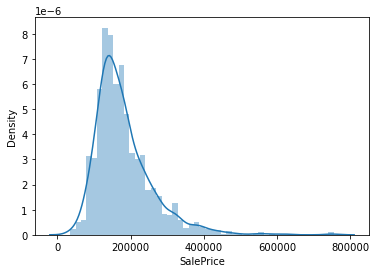

In [10]:
sns.distplot(data_train['SalePrice'])

* 峰度（Kurtosis）和 偏度（Skewness）的概念。

* 峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。它是和正态分布相比较的。

>Kurtosis=0 与正态分布的陡缓程度相同。
Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
Kurtosis<0 比正态分布的高峰来得平台——平顶峰计算公式：β = M_4 /σ^4 偏度：

* 偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量。

>Skewness=0 分布形态与正态分布偏度相同
Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。

In [11]:
data_train['SalePrice'].skew(),data_train['SalePrice'].kurt()

(1.8828757597682129, 6.536281860064529)

>* Targe值确实是右偏的,现在利用利用log(1+x)进行log变换


In [12]:
data_train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [13]:
#data_train["SalePrice"]=np.log1p(data_train["SalePrice"])

> SalePrice是非正态分布，由于要分析其与其他特征的相关性暂不做log(1+x)转换。后面要进行转换

In [14]:
data_train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

#### 2.2   分析特征变量

> 训练集一共80个特征，
* 其中有46个分类型号变量特征，34个连续型变量特征。
* 从中初步筛选，并假定这些特征与目标变量相关，后面再做验证。

    
| 特征变量 | 数据类型 | 含义 | 
| :-----| ----: | :----: 
| MSZoning | 分类 | 区域分类 |
| LotArea | 连续 | 建筑面积 |
| Utility | 分类 | 公用设施提供 |
| Neighborhood | 分类 | 地理位置 |
| BldgType | 分类 | 住宅类型 |
| OverallQual| 分类 | 完工质量及用才 |
| YearBuilt | 分类 | 完工年份 |
| Heating | 分类 | 供热 |
| CentralAir | 分类 | 中央空调 |
| 1stFlrSF | 连续 | 1层面积 |
| GrLivArea | 连续 | 地面上生活区域 |
| TotalBsMtSF | 连续 | 地下室面积 |

In [15]:
def var_corr_plot(var):
    data = pd.concat([data_train['SalePrice'], var], axis=1)
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

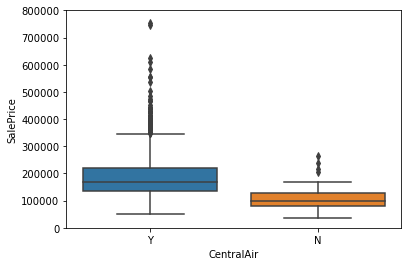

In [22]:
var_corr_plot(data_train['CentralAir'])

> 结论： "CentralAir"指标和目标变量相关。

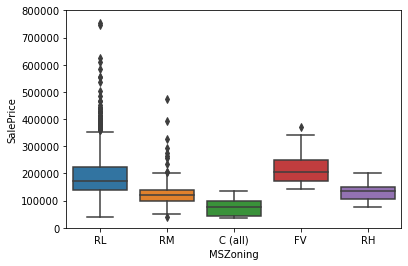

In [19]:
var_corr_plot(data_train['MSZoning'])

>结论： MSZoning 和目标变量相关，保留。

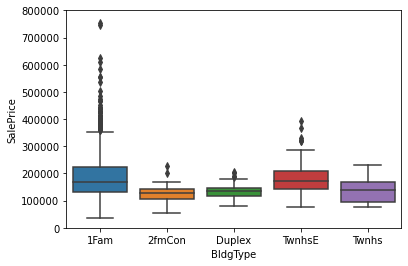

In [20]:
var_corr_plot(data_train['BldgType'])

> BldgType 这个指标和目标变量关联性不强，不考虑。

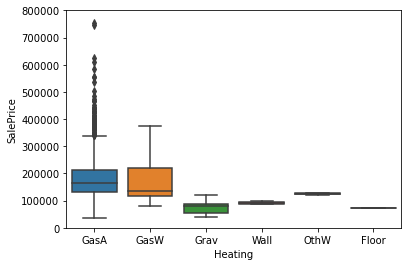

In [21]:
var_corr_plot(data_train['Heating'])

> 结论：Heating和目标变量关联性不大，不考虑。

In [23]:
data_train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

> 结论： Utility 特征值都是AllPub,不考虑此特征与特征变量的相关性。

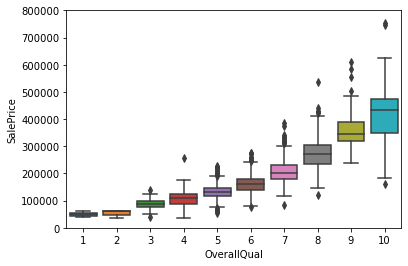

In [24]:
var_corr_plot(data_train['OverallQual'])

> "OveralQual"是标识房屋整体材质的指标，数值越高级别越高，这个是强相关指标。

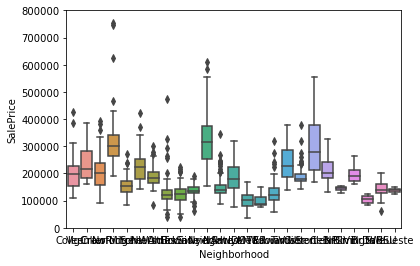

In [25]:
var_corr_plot(data_train['Neighborhood'])

>Neighborhood 和价格关联性特征并不明显，不考虑。

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

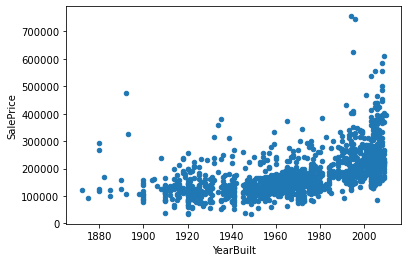

In [26]:
var="YearBuilt"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

>修建年份和价格存在一定的相关性，保留此特征。

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

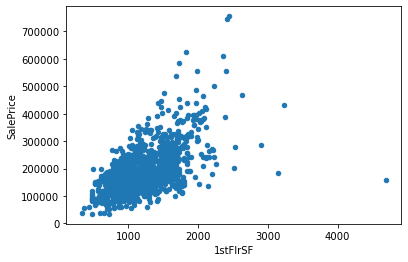

In [27]:
var="1stFlrSF"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

> 结论：1stFlrSF 与目标变量线性相关，保留。

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

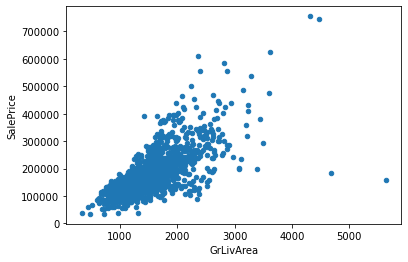

In [28]:
var="GrLivArea"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

> 结论：GrLivArea 与目标变量线性相关，保留。

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

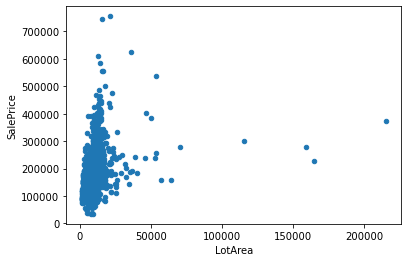

In [29]:
var="LotArea"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

> 结论：LotArea 与目标变量线性相关，保留。

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

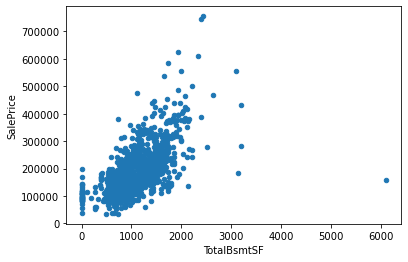

In [30]:
var="TotalBsmtSF"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

> 结论：TotalBsMtSF 与目标变量线性相关，保留。

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

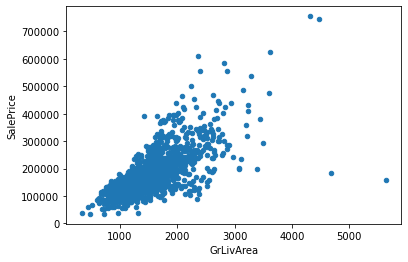

In [31]:
var="GrLivArea"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

> ***结论：GrLivArea 与目标变量线性相关，保留。***

> 小结:1 目前从假定的13个相关特征，筛选到9个特征。\
     2 连续型特征变量均与面积相关，猜测各个面积变量是否存在相关性，\ 
      在后面的分析中再次确认。
     3 目前确定的变量如下：

     
| 特征变量 | 数据类型 | 含义 | 
| :-----| ----: | :----: 
| MSZoning | 分类 | 区域分类 |
| LotArea | 连续 | 建筑面积 |
| OverallQual| 分类 | 完工质量及用才 |
| YearBuilt | 分类 | 完工年份 |
| CentralAir | 分类 | 中央空调 |
| 1stFlrSF | 连续 | 1层面积 |
| GrLivArea | 连续 | 地面上生活区域 |
| TotalBsMtSF | 连续 | 地下室面积 |

###  **三 深入探索数据关系，确认主要特征变量**
**这个阶段主要任务是：** \
1 在步骤二的基础上，进一步筛选特征变量；\
2 确定最终特征变量集

In [ ]:
corrmat = data_train.corr()
corrmat['SalePrice'].sort_values()

<AxesSubplot:>

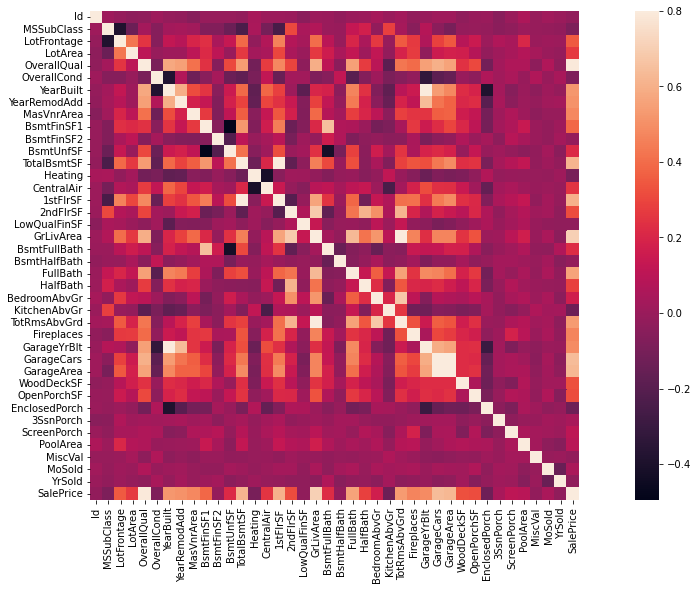

In [32]:
# 将Central 和Heating两个连续型变量做One-hot编码，查看相关性
from sklearn import preprocessing
f_names=['CentralAir','Heating']
for x in f_names:
    label= preprocessing.LabelEncoder()
    data_train[x]= label.fit_transform(data_train[x])
corrmat=data_train.corr()
f,ax= plt.subplots(figsize=(20,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

>从热图可以看出很多，包括
1 OVerallQual相关性最高；
2 GrLivArea，1stFIrSE相关性次之；
2 LoTArea, CentralAir、NeighhbourHood 相关性比较低；

In [ ]:
corrmat

In [33]:
corrmat['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
Heating         -0.098812
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
CentralAir       0.251328
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual 

>1 GraggeCars和GarageArea 相关性高，选择GarageCares；\
 2 新添加TotalBsMtSF 这个特征；
 
| 特征变量 | 数据类型 | 含义 | 
| :-----| ----: | :----: 
| OverallQual| 分类 | 完工质量及用才 |
| GrLivArea | 连续 | 地面上生活区域 |
| GarageCars | 分类 | 完工年份 |
| TotalBsMtSF | 连续 | 地下室面积 |
| 1stFlrSF | 连续 | 1楼建筑面积 |
| FullBath | 分类 | 浴室数量 |






In [34]:
columns=['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath']

**注意 ：到此,对特征的筛选及相关特征确定基本结束** 

###  四  利用线性回归模型，对已有数据进行训练

In [35]:
from sklearn.linear_model import LinearRegression as LR
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [36]:
x=data_train[columns]
y=data_train['SalePrice'].values.reshape(-1,1)
x

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath
0,7,1710,2,856,856,2
1,6,1262,2,1262,1262,2
2,7,1786,2,920,920,2
3,7,1717,3,756,961,1
4,8,2198,3,1145,1145,2
...,...,...,...,...,...,...
1455,6,1647,2,953,953,2
1456,6,2073,2,1542,2073,2
1457,7,2340,1,1152,1188,2
1458,5,1078,1,1078,1078,1


#### 4.1 使用sklearn的归一法对x和y进行处理

In [37]:
x_scaledd = preprocessing.StandardScaler().fit(x)
x_scaled=x_scaledd.transform(x)

In [38]:
y_scaledd = preprocessing.StandardScaler().fit(y)
y_scaled=y_scaledd.transform(y)

In [39]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)

In [40]:
y_scaled.shape

(1460, 1)

In [41]:
model = LR().fit(x_train, y_train)
yhat = model.predict(x_test)

In [42]:
yhat.shape

(482, 1)

In [43]:
model.intercept_

array([-0.01568558])

In [44]:
model.coef_

array([[0.42348183, 0.22544829, 0.19139596, 0.08854611, 0.07371278,
        0.02166249]])

In [45]:
yhat.shape,y.shape

((482, 1), (1460, 1))

In [ ]:
#model.score(X_test,y_test)

#### 4.2  现在我们对目标值做log1p()处理，即log（1+x），对比看看不做log1p()孰优孰劣。

In [ ]:
#y_scaled = preprocessing.StandardScaler().fit_transform(y.values.reshape(-1,1))

In [ ]:
#y=data_train['SalePrice']

In [ ]:
#X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)

In [68]:
model_log1p.coef_

array([1.25419186e-01, 1.72762940e-04, 1.13960505e-01, 1.22932488e-04,
       3.75829472e-05, 3.97406655e-02])

#### 五 利用训练集上确定的特征集，运用于测试集合上面，完成task。

In [47]:
x_test= pd.read_csv("c:/csv/test_houseprice.csv")
x_test_var=x_test[columns]

In [48]:
x_test_var.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
TotalBsmtSF    1
1stFlrSF       0
FullBath       0
dtype: int64

>可以看出，相关特征缺失值比较少，可以使用均值进行填充。

In [49]:
x_test_var["GarageCars"].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [50]:
x_test_var["TotalBsmtSF"].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [51]:
x_test_var["TotalBsmtSF"].fillna(1046.11,inplace=True)

In [52]:
x_test_var["GarageCars"].fillna(1.76,inplace=True)

In [53]:
x_test_var.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
1stFlrSF       0
FullBath       0
dtype: int64

In [54]:
x_test_var

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath
0,5,896,1.0,882.0,896,1
1,6,1329,1.0,1329.0,1329,1
2,5,1629,2.0,928.0,928,2
3,6,1604,2.0,926.0,926,2
4,8,1280,2.0,1280.0,1280,2
...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,546,1
1455,4,1092,1.0,546.0,546,1
1456,5,1224,2.0,1224.0,1224,1
1457,5,970,0.0,912.0,970,1


In [55]:
x_test_scaled= x_scaledd.transform(x_test_var)

In [56]:
x_test_scaled

array([[-0.79515147, -1.17925611, -1.02685765, -0.40001694, -0.68992894,
        -1.02604084],
       [-0.07183611, -0.35496585, -1.02685765,  0.61923935,  0.43051105,
        -1.02604084],
       [-0.79515147,  0.21613595,  0.31172464, -0.29512703, -0.60712506,
         0.78974052],
       ...,
       [-0.79515147, -0.55485148,  0.31172464,  0.37981673,  0.15881082,
        -1.02604084],
       [-0.79515147, -1.03838433, -2.36543995, -0.33161048, -0.49844497,
        -1.02604084],
       [ 0.65147924,  0.92239851,  1.65030694, -0.14007238, -0.43116682,
         0.78974052]])

In [57]:
y_hat=model.predict(x_test_scaled)

In [58]:
y_hat

array([[-0.92331859],
       [-0.25833092],
       [-0.29780493],
       ...,
       [-0.39473418],
       [-1.12758659],
       [ 0.75694168]])

In [59]:
y_scaledd.inverse_transform(y_hat)

array([[107595.58063333],
       [160405.77021107],
       [157270.93013093],
       ...,
       [149573.26569948],
       [ 91373.57742572],
       [241033.94047821]])

In [60]:
y_scaledd.inverse_transform(y_hat).shape

(1459, 1)

In [61]:
x_test_var['SalePrice']=y_scaledd.inverse_transform(y_hat)

In [62]:
pred_price = x_test_var['SalePrice']
pred_price

0       107595.580633
1       160405.770211
2       157270.930131
3       180682.250697
4       229329.191339
            ...      
1454     58914.800694
1455     79260.938742
1456    149573.265699
1457     91373.577426
1458    241033.940478
Name: SalePrice, Length: 1459, dtype: float64

In [63]:
result = pd.concat([x_test['Id'], pred_price],axis=1)
result

,Id,SalePrice
0,1461,107595.580633
1,1462,160405.770211
2,1463,157270.930131
3,1464,180682.250697
4,1465,229329.191339
...,...,...
1454,2915,58914.800694
1455,2916,79260.938742
1456,2917,149573.265699
1457,2918,91373.577426


In [64]:
result.to_csv("c:/csv/pred_houseprice.csv")

#### 5.2  利用在训练集中的对y的log1p()模型，在测试集合再预测一遍，看kaggle成绩有无提升。

In [80]:
y_train_log1p=np.log1p(data_train["SalePrice"])
model_log1p = LR().fit(x, y_train_log1p)
model_log1p.coef_
#yhat_1 = model.predict(X_test)

array([1.25419186e-01, 1.72762940e-04, 1.13960505e-01, 1.22932488e-04,
       3.75829472e-05, 3.97406655e-02])

In [81]:
x_test_var

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,SalePrice
0,5,896,1.0,882.0,896,1,107595.580633
1,6,1329,1.0,1329.0,1329,1,160405.770211
2,5,1629,2.0,928.0,928,2,157270.930131
3,6,1604,2.0,926.0,926,2,180682.250697
4,8,1280,2.0,1280.0,1280,2,229329.191339
...,...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,546,1,58914.800694
1455,4,1092,1.0,546.0,546,1,79260.938742
1456,5,1224,2.0,1224.0,1224,1,149573.265699
1457,5,970,0.0,912.0,970,1,91373.577426


In [87]:
x_test_varr=x_test_var.iloc[:,0:6]
x_test_varr

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath
0,5,896,1.0,882.0,896,1
1,6,1329,1.0,1329.0,1329,1
2,5,1629,2.0,928.0,928,2
3,6,1604,2.0,926.0,926,2
4,8,1280,2.0,1280.0,1280,2
...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,546,1
1455,4,1092,1.0,546.0,546,1
1456,5,1224,2.0,1224.0,1224,1
1457,5,970,0.0,912.0,970,1


In [88]:
y_pred_log1p=model_log1p.predict(x_test_varr)

In [89]:
y_pred_log1p

array([11.63769727, 11.90914705, 11.92489123, ..., 11.86269414,
       11.54299034, 12.3647002 ])

In [90]:
len(y_pred_log1p)

1459

In [92]:
x_test_var['SalePrice1']= np.expm1(y_pred_log1p)

In [93]:
x_test_var['SalePrice1']

0       113287.990592
1       148618.859944
2       150977.274233
3       170359.201711
4       219114.869265
            ...      
1454     87352.621017
1455     97896.889855
1456    141872.931953
1457    103051.138356
1458    234379.280177
Name: SalePrice1, Length: 1459, dtype: float64

In [94]:
x_test_var

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,SalePrice,SalePrice1
0,5,896,1.0,882.0,896,1,107595.580633,113287.990592
1,6,1329,1.0,1329.0,1329,1,160405.770211,148618.859944
2,5,1629,2.0,928.0,928,2,157270.930131,150977.274233
3,6,1604,2.0,926.0,926,2,180682.250697,170359.201711
4,8,1280,2.0,1280.0,1280,2,229329.191339,219114.869265
...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,546,1,58914.800694,87352.621017
1455,4,1092,1.0,546.0,546,1,79260.938742,97896.889855
1456,5,1224,2.0,1224.0,1224,1,149573.265699,141872.931953
1457,5,970,0.0,912.0,970,1,91373.577426,103051.138356


In [95]:
result1=pd.concat([x_test['Id'],x_test_var['SalePrice1']],axis=1)

In [96]:
result1

,Id,SalePrice1
0,1461,113287.990592
1,1462,148618.859944
2,1463,150977.274233
3,1464,170359.201711
4,1465,219114.869265
...,...,...
1454,2915,87352.621017
1455,2916,97896.889855
1456,2917,141872.931953
1457,2918,103051.138356


In [97]:
result1.to_csv("c:/csv/pred_houseprice2.csv")

>****至此，整个分析过程结束！胜利大逃亡！****